In [1]:
# ------ Import module ------
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
# ------ Define functions ------
def run_kmeans(n_clusters_f, init_f, df_f):
    # Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.
    k_means_model_f = KMeans(n_clusters=n_clusters_f, init=init_f)
    k_means_model_f.fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_

    # summarize cluster attributes
    #k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(np.mean)
    return k_means_model_f, k_means_model_f_summary

Dataset source: [Book Recommendation dataset | Kaggle](https://www.kaggle.com/arashnic/book-recommendation-dataset)

In [3]:
# ------ Import data ------
df1 = pd.read_csv('../books_agg.csv', index_col=0)
df1.head(3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0,"timmins, ontario, canada",NaN,timmins,ontario,canada


In [4]:
df1['User-ID'].value_counts()

11676.0     13602
198711.0     7550
153662.0     6109
98391.0      5891
35859.0      5850
            ...  
2433.0          1
38927.0         1
38926.0         1
38925.0         1
2.0             1
Name: User-ID, Length: 278858, dtype: int64

In [5]:
#plt.hist(df1['User-ID'].value_counts())

<BarContainer object of 165 artists>

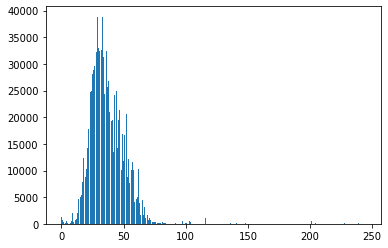

In [6]:
#plt.hist(df1['Age'].value_counts())
plt.bar(df1['Age'].value_counts().keys(), list(df1['Age'].value_counts()))

In [7]:
df1 = df1[df1['Age']<100]

In [8]:
#df1.drop(df1[df1['Age']>100].index, inplace=True)

<BarContainer object of 100 artists>

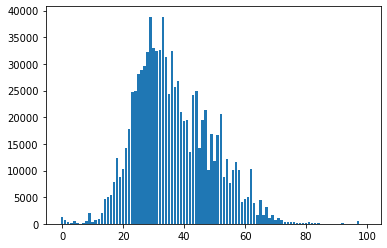

In [9]:
plt.bar(df1['Age'].value_counts().keys(), list(df1['Age'].value_counts()))

In [10]:
df1.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age', 'City', 'State', 'Country'],
      dtype='object')

In [11]:
df1.shape

(942517, 15)

In [12]:
df1.isnull().sum()

ISBN                   105771
Book-Title             192242
Book-Author            192243
Year-Of-Publication    192242
Publisher              192244
Image-URL-S            192242
Image-URL-M            192242
Image-URL-L            192244
User-ID                     0
Book-Rating            105771
Location                    0
Age                         0
City                     2141
State                     780
Country                 13057
dtype: int64

Dataset Source: [Good Reads Books | Kaggle](https://www.kaggle.com/jealousleopard/goodreadsbooks)

In [13]:
df2 = pd.read_csv('../books/GoodReadBooks.csv', error_bad_lines=False)
df2.head(3)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [14]:
df2.shape

(11123, 12)

In [15]:
df = df1.merge(df2, left_on='ISBN', right_on='isbn')
df.shape

(39691, 27)

In [16]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age', 'City', 'State', 'Country', 'bookID', 'title',
       'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [17]:
df = df[['Year-Of-Publication', 'Book-Rating', #'Publisher'
       'Age', 'Country', #'City', 'State',
        'average_rating', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count']]

In [18]:
#df.dtypes

In [19]:
df.dropna(inplace=True)

In [20]:
#df.isnull().sum()

In [21]:
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype('int64')

In [22]:
df['Age'] = df['Age'].astype('int64')

In [23]:
df.dtypes

Year-Of-Publication      int64
Book-Rating            float64
Age                      int64
Country                 object
average_rating         float64
language_code           object
  num_pages              int64
ratings_count            int64
text_reviews_count       int64
dtype: object

In [24]:
len(set(df['Country']))

114

In [25]:
len(set(df['language_code']))

11

In [26]:
df['Country'] = df['Country'].str.strip()

In [27]:
#dict(df['Country'].value_counts())

In [28]:
states = ['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'dc',
          'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky',
          'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 
          'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york',
          'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 
          'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 
          'west virginia', 'wisconsin', 'wyoming']

In [29]:
def clean_country(country):
    if (country=='united kingdom') or (country=='england') or (country=='u.k.') \
        or (country=='cambridgeshire') or (country=='west yorkshire') or (country=='guernsey'):
        return 'uk'
    elif country == 'british columbia':
        return 'canada'
    elif (country=='new zealand"'):
        return 'new zealand'
    elif (country in states) or (country=='united state') or (country=='united states') or (country=='u.s.a.'):
        return 'usa'
    elif (country=='portugal"') or (country=='oeiras'):
        return 'portugal'
    elif (country=='france"'):
        return 'france'
    elif (country=='queensland'):
        return 'australia'
    elif (country=='españa') or (country=='canary islands') or (country=='euskal herria'):
        return 'spain'
    elif (country=='francisco morazan'):
        return 'honduras'
    elif (country=='phillipines'):
        return 'philippines'
    elif (country=='far away...') or (country=='') or (country=='n/a - on the road') or \
         (country=='n/a') or (country=='quit') or (country=='universe') or (country=='antarctica'):
        return 'false'
    else:
        return country

In [30]:
df['country_clean'] = df['Country'].apply(clean_country)

In [31]:
#dict(df['country_clean'].value_counts())

In [32]:
def convert_country(country):
    if (country=='usa') or (country=='canada') or (country=='uk') \
        or (country=='australia') or (country=='new zealand') or (country=='ireland'):
        return 'north_america_british' # and historic british colonies
    elif (country=='brazil') or (country=='dominican republic') or (country=='mexico') or \
         (country=='trinidad and tobago') or (country=='chile') or (country=='bermuda') or (country=='peru') or \
         (country=='honduras') or (country=='argentina') or (country=='jamaica') or (country=='cuba') or \
         (country=='grenada') or (country=='venezuela') or (country=='ecuador') or (country=='west indies') or \
         (country=='barbados') or (country=='costa rica') or (country=='haiti') or (country=='colombia'): 
        return 'central_south_america' # and mexico
    elif (country=='portugal') or (country=='germany') or (country=='spain') or (country=='france') or \
         (country=='netherlands') or (country=='italy') or (country=='romania') or (country=='switzerland') or \
         (country=='finland') or (country=='austria') or (country=='belgium') or (country=='norway') or \
         (country=='denmark') or (country=='sweden') or (country=='poland') or (country=='bulgaria') or \
         (country=='iceland') or (country=='greece') or (country=='czech republic') or (country=='cyprus') or \
         (country=='slovenia') or (country=='luxembourg') or (country=='russia') or (country=='albania') or \
         (country=='hungary'):
        return 'europe'
    elif (country=='iran') or (country=='qatar') or (country=='israel') or (country=='kuwait') or \
         (country=='turkey'):
        return 'middle_east'
    elif (country=='malaysia') or (country=='japan') or (country=='philippines') or (country=='china') or \
         (country=='singapore') or (country=='hong kong') or (country=='taiwan') or (country=='south korea') or \
         (country=='phillipines'):
        return 'east_asia'
    elif (country=='india') or (country=='sri lanka') or (country=='afghanistan') or (country=='pakistan'):
        return 'south_asia'
    elif (country=='egypt') or (country=='south africa') or (country=='tanzania') or (country=='nigeria') or \
         (country=='kenya') or (country=='zambia'):
        return 'africa'

In [33]:
df['region'] = df['country_clean'].apply(convert_country)

In [34]:
dict(df['region'].value_counts())

{'north_america_british': 35209,
 'europe': 2476,
 'east_asia': 419,
 'central_south_america': 105,
 'middle_east': 94,
 'africa': 16,
 'south_asia': 7}

In [35]:
#df.columns

In [36]:
df = df[['Year-Of-Publication', 'Book-Rating', 'Age',
       'average_rating', 'language_code', '  num_pages', 'ratings_count',
       'text_reviews_count', 'region']]

In [37]:
df.columns = ['year', 'rating', 'age', 'rating_avg', 'lang', 'pages', 'ratings_count', 'reviews_count', 'region']

In [38]:
new_df = pd.get_dummies(df)
new_df.head(3)

,year,rating,age,rating_avg,pages,ratings_count,reviews_count,lang_en-CA,lang_en-GB,lang_en-US,...,lang_mul,lang_rus,lang_spa,region_africa,region_central_south_america,region_east_asia,region_europe,region_middle_east,region_north_america_british,region_south_asia
0,1998,0.0,49,3.88,465,294348,9096,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1998,0.0,29,3.88,465,294348,9096,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1998,0.0,36,3.88,465,294348,9096,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
new_df.shape

(38348, 25)

In [40]:
# ------ RUN CLUSTERING -----

In [41]:
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

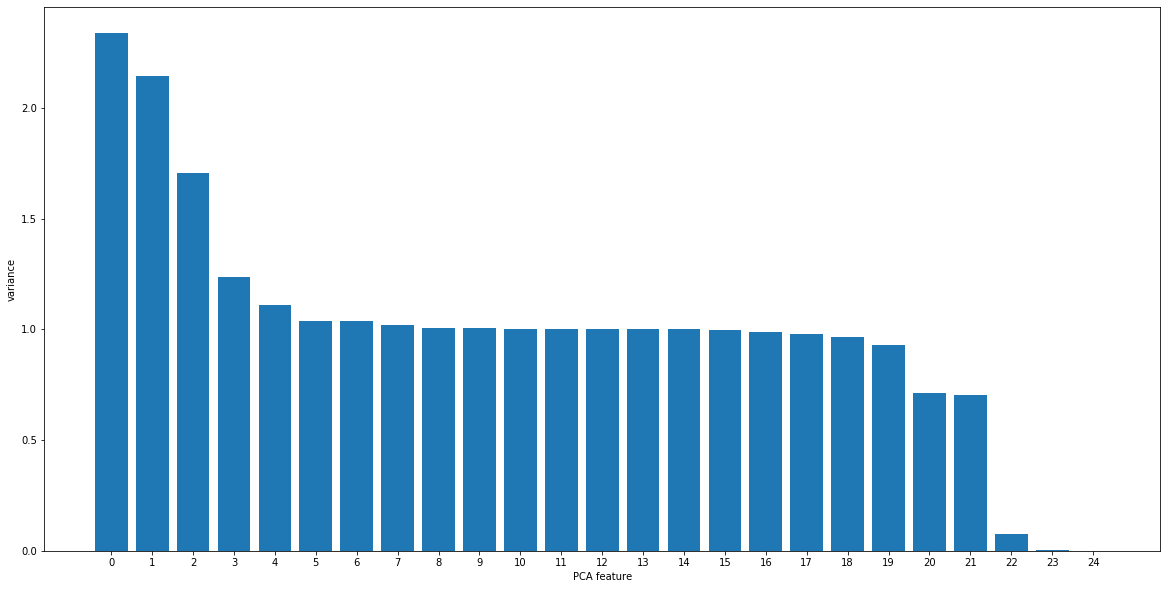

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(new_df)

features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
#plt.xlim(-1,85)
plt.savefig('pca.png')
plt.show()

In [43]:
# --- select data
cols_for_clustering_full = new_df.columns
df_cluster = new_df.reindex(columns=cols_for_clustering_full)
# df_cluster = df.loc[:, cols_for_clustering]

In [44]:
# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(
    df_cluster, [1]*df_cluster.shape[0], test_size=0.33)   # ignoring y values for unsupervised

In [45]:
# training data
train_model, train_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_train.reindex())
# testing data
test_model, test_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_test.reindex())
# all data
model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

In [46]:
# --- run for various number of clusters
ks = range(1, 16)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_cluster)
    inertias.append(model.inertia_)

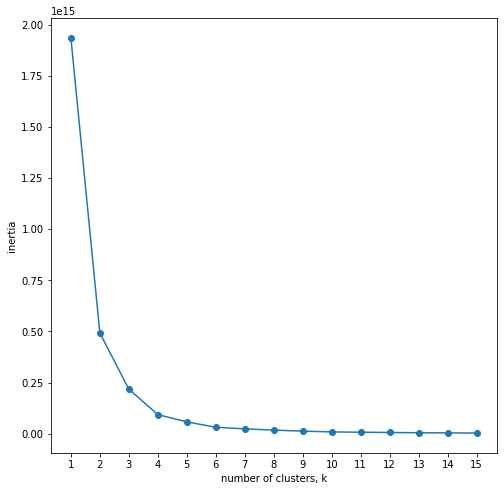

In [54]:
# --- draw elbow plot
plt.figure(figsize=(8,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.savefig('elbow_plot.png')
plt.show()

In [48]:
# --- output tagged data for examination ----
#df_cluster.to_csv('clustering_output.csv')